# Ch.11 Math Tools
In this notebook we will see some mathematical operations such as data interpolation and regression. **Interpolation** is used to approximate a function for which we do not know the [closed form expression](https://en.wikipedia.org/wiki/Closed-form_expression). Since it is known that every function can be represented by a linear combination of polynamial terms we use Gauss least squares method to approximate the unknown function. The least squares method consists of minimizing the sum of squared residuals that are the difference betwenn the value of the unknown function, e.g. computed on a linear grid, and the value of the interpolation function at the same points.  

In [20]:
import math
import numpy as np  
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval
import pandas as pd  
from pylab import plt, mpl
import warnings
warnings.filterwarnings('ignore')
print('Matplotlib version: {}'.format(mpl.__version__))
print('NumPy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))

Matplotlib version: 3.8.4
NumPy version: 1.26.4
Pandas version: 2.2.2


In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50) 
y = f(x)

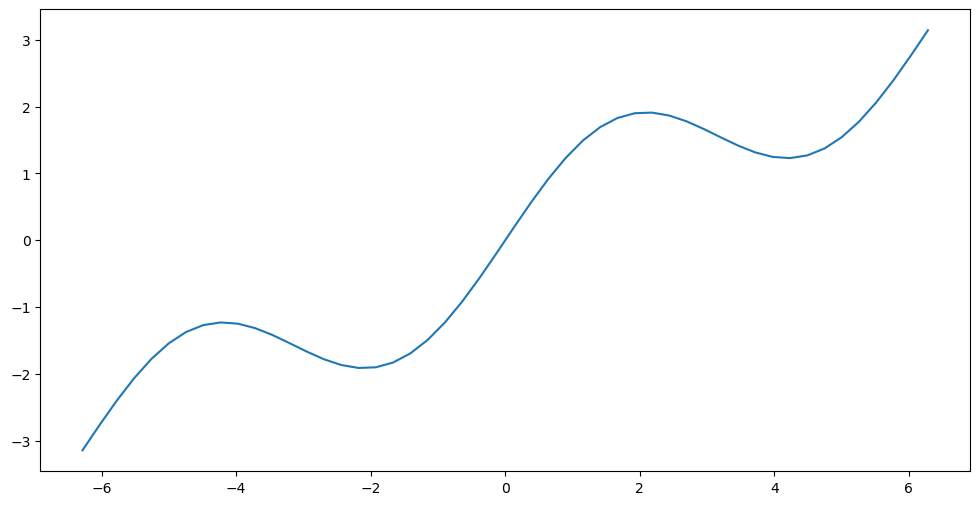

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y)

In [45]:
f1_interp = Polynomial.fit(x, y, deg=1, window=(-2 * np.pi, 2 * np.pi), full=True)
f1_interp

(Polynomial([-2.69977211e-16,  4.28841952e-01], domain=[-6.28318531,  6.28318531], window=[-6.28318531,  6.28318531], symbol='x'),
 [array([21.03238686]), 2, array([1., 1.]), 1.1102230246251565e-14])

In [49]:
r1y = f1_interp[0](x)

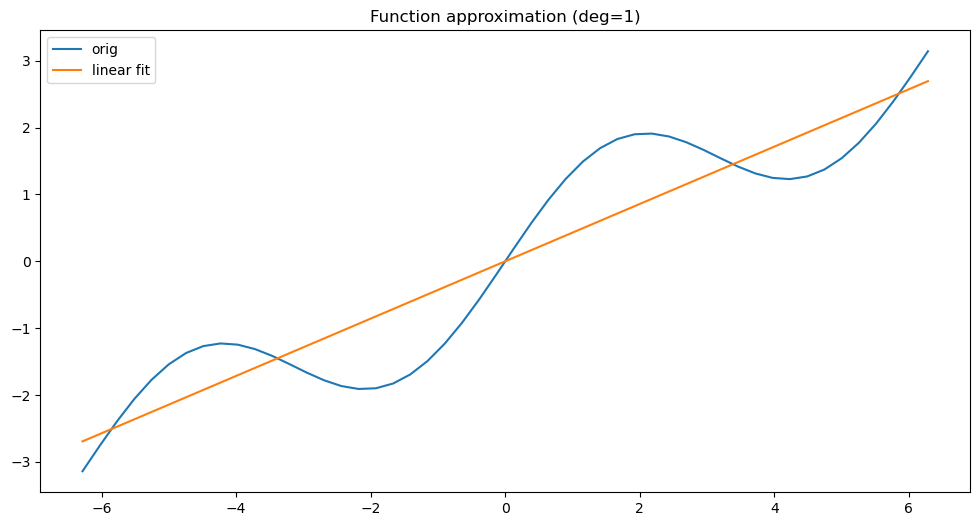

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation (deg=1)')
ax.plot(x, y, label='orig')
ax.plot(x, r1y, label='linear fit')
plt.legend(loc=0)

In [48]:
f5_interp = Polynomial.fit(x, y, deg=5, window=(-2 * np.pi, 2 * np.pi), full=True)
f5_interp

(Polynomial([-1.85332937e-15,  1.11425209e+00,  1.25613233e-16, -6.82525072e-02,
        -6.57491881e-18,  1.37920761e-03], domain=[-6.28318531,  6.28318531], window=[-6.28318531,  6.28318531], symbol='x'),
 [array([2.69412578]),
  6,
  array([1.67645134, 1.59568047, 0.65795415, 0.42968039, 0.14456894,
         0.06989757]),
  1.1102230246251565e-14])

In [52]:
r5y = f5_interp[0](x)

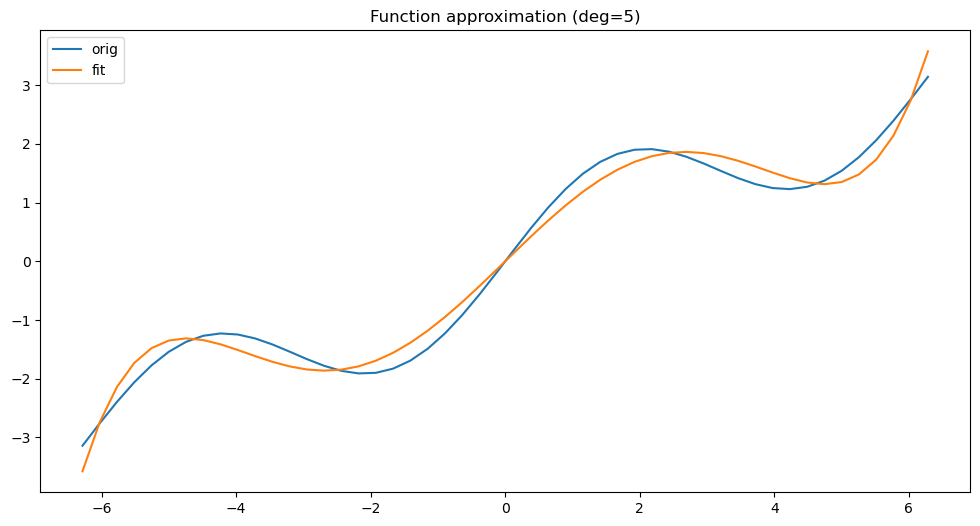

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Function approximation (deg=5)')
ax.plot(x, y, label='orig')
ax.plot(x, r5y, label='fit')
plt.legend(loc=0)